<a href="https://colab.research.google.com/github/poniyam/personal/blob/main/1%EC%A3%BC%EC%B0%A8/1_Display_Sensor_Anomaly_Analysis_%EA%B2%B0%EC%B8%A1%EC%B9%98%EC%B2%98%EB%A6%AC%EC%99%80_%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98%EC%A0%80%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결측치 처리
- 결측치의 7개의 컬럼과 3개의 행 제거함.

## 컬럼 분리
- 결측치를 제거한 fact_data를 와 sensor, 폐기율으로 나눈 3가지를 파일에 각각 저장하였음.
- 전체 데이터 : fact_data
- sensor 데이터 : sensor_data
- 폐기율 관련 데이터 : trash_data

## 상관계수 파일 저장
- (결측치로 제거된)모든 sensor column끼리의 상관계수를 구하여 파일 저장
- all_col_corr



In [ ]:
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
from scipy import stats
import seaborn as sns
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Display_Sensor_Anomaly_Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
plt.rc('font', family='Arial') 

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)

In [ ]:
working_dir = ''

In [ ]:
fact_init_data = pd.read_csv(working_dir + 'factory_glass_2016.csv', encoding='cp949',index_col='dat...date.name.')

In [ ]:
fact_init_data

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,...,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,...,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
2016-01-01 08,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,...,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2016-01-01 09,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,...,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
2016-01-01 10,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,...,0,0,4.96,10.29,0.00,4.96,0.000,0.103,0.000,0.000
2016-01-01 11,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,...,0,0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,...,14,0,8.72,3.06,14.43,8.72,0.000,0.031,0.144,0.000
2016-12-31 20,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,...,13,1,8.37,3.13,13.08,8.37,0.010,0.021,0.121,0.009
2016-12-31 21,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,...,11,3,7.49,2.56,12.73,7.49,0.017,0.009,0.100,0.027


In [ ]:
fact_init_data.shape

(8145, 840)

### 결측치 확인 
- 결측치를 가진 컬럼들이 134개 존재함.

In [ ]:
# 초기 shape
print(fact_init_data.shape)

x = fact_init_data.isnull().sum().sort_values(ascending=False)
len(np.where(x > 0)[0])

(8145, 840)


134

- 전체행(8145)이 NaN인 컬럼의 수가 7개 존재 => 컬럼삭제

In [ ]:
print(fact_init_data.isnull().sum().sort_values(ascending=False).head(10))
fact_init_data = fact_init_data.dropna(how='all', axis=1)
# 컬럼수 확인
print(fact_init_data.shape)

ROOF.HEATING.Zone52.1JIC31152.PV        8145
UPPER.RET..Z218.TMP.1TIC42601.PV        8145
ROOF.HEATING.Zone78.1JIC31178.PV        8145
ROOF.HEATING.Zone76.1JIC31176.PV        8145
LEHR.DRV.MTR..M19.2.CUR.1WII40135.PV    8145
DCS_Offset_RPM_M14.1WOS45114_PV         8145
DCS_Offset_RPM_M13.1WOS45113_PV         8145
DB.HEAT.TOP.4.1.2.TMP.CT.1JI40304.PV       1
DB.HEAT.TOP.5.1.2.TMP.CT.1JI40305.PV       1
DB.HEAT.TOP.7.1.2.TMP.CT.1JI40307.PV       1
dtype: int64
(8145, 833)


## 결측치가 존재하는 행 출력과 삭제
- 3행에 모두 몰려있는데 NaN이 1개 존재하는 행은 mean값으로 대체하고 나머지 2개의 행은 삭제한다.

In [ ]:
fact_init_data[fact_init_data.isnull().any(axis=1)]

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,...,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,
2016-06-24 04,1.467846,1.465863,1.466053,1.418393,1.477109,1.419455,1.477109,1.421954,1.396569,1.421954,...,0,0,2.29,4.88,0.00,2.29,0.024,0.024,0.000,0.0
2016-10-13 09,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,...,12,0,14.74,13.41,16.22,14.74,0.073,0.061,0.162,0.0
2016-12-27 17,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,...,3,0,2.78,0.00,5.66,2.78,0.000,0.000,0.057,0.0


In [ ]:
drop_index = list(fact_init_data[fact_init_data.isnull().any(axis=1)].index)
print(drop_index)
print('\n<각 행의 NaN개수>')
for i in drop_index:
    print(fact_init_data.loc[i].isnull().sum())

# NaN가 있는 1개보다 많은 행 삭제
# fact_data = fact_init_data.dropna(axis=0, thresh=len(fact_init_data.columns)-1)
# fact_init_data.dropna(axis=0, thresh=len(fact_init_data.columns)-1)

['2016-06-24 04', '2016-10-13 09', '2016-12-27 17']

<각 행의 NaN개수>
1
39
87


## 결측치가 존재하는 행을 각 변수의 평균치로 결측치 대체

In [ ]:
# NaN 있는 행 - ffill로 값 채우기
fact_data = fact_init_data.fillna(method='ffill')
fact_data[fact_data.isnull().any(axis=1)]

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,...,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,


##  분산 구하기
- 분산을 출력해봤지만 분산값의 어떤 기준으로 컬럼을 삭제해도 되는지 모르겠어서 일단 다른 방법을 찾아봤습니다.


In [ ]:
var_list = np.var(fact_data)
var_list

LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101     1.000120
LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102     1.000179
LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103     1.000158
LEHR.DRV.MTR..M4.1.SPD.1WSI40104      1.000278
LEHR.DRV.MTR..M4.2.SPD.1WSI40105      1.000104
                                       ...    
ROLLDOWN.진공패드.폐기율..전체.               22.484980
L.RD                                  0.002029
L.Vac                                 0.001013
R.RD                                  0.002271
R.Vac                                 0.000251
Length: 833, dtype: float64

## sklearn의 VarianceThreshold를 이용한 컬럼 제거
- VarianceThreshold를 이용하여 분산이 0에 수렴하는 컬럼을 제거했습니다.
- [VarianceThreshold에 대한 문서 참조1](https://runebook.dev/en/docs/scikit_learn/modules/generated/sklearn.feature_selection.variancethreshold)
- [VarianceThreshold에 대한 문서 참조2](https://datascienceschool.net/03%20machine%20learning/14.03%20%ED%8A%B9%EC%A7%95%20%EC%84%A0%ED%83%9D.html#id2)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 분산이 0에 수렴하는 컬럼을 제거하고 DataFrame을 반환하는 함수
def VarianceThreshold_selector(data):
    # 임계값으로 0을 지정
    selector = VarianceThreshold(0)
    selector.fit(data)
    # 남겨지는 컬럼index 저장
    features = selector.get_support(indices = True)
    # 남겨지는 컬럼명 저장
    features = [data.iloc[:,column].name for column in features]
    # 삭제 컬럼명 출력
    deleted_columns = [column for column in data.columns if column not in features]
    print('삭제된 컬럼명의 개수 : ', len(deleted_columns))
    print('\n 삭제된 컬럼명 : ')
    for i in deleted_columns:
        print(i)
    selector = pd.DataFrame(selector.transform(data))
    selector.index = data.index
    selector.columns = features
    # DataFrame 반환
    return selector

print('컬럼제거 전 : ',  fact_data.shape)
fact_data = VarianceThreshold_selector(fact_data)
print('컬럼제거 후 : ',  fact_data.shape)

컬럼제거 전 :  (8145, 833)
삭제된 컬럼명의 개수 :  7

 삭제된 컬럼명 : 
LEHR.DRV.MTR..M4.2.CUR.1WII40105.PV
LEHR.DRV.MTR..M9.1.CUR.1WII40114.PV
LEHR.DRV.MTR..M9.2.CUR.1WII40115.PV
LEHR.DRV.MTR..M10.1.CUR.1WII40116.PV
LEHR.DRV.MTR..M14.1.CUR.1WII40124.PV
LEHR.DRV.MTR..M17.2.CUR.1WII40131.PV
TMP.TIN..BAY.4.LEFT.1TI30203.PV
컬럼제거 후 :  (8145, 826)


## 상관계수구하기

In [ ]:
corr_df = fact_data.corr().abs()
corr_df

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,...,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,1.000000,0.998529,0.998961,0.946999,0.999621,0.947509,0.999621,0.948637,0.998814,0.948637,...,0.287971,0.209859,0.324195,0.246990,0.285723,0.324195,0.187901,0.199848,0.258747,0.208441
LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,0.998529,1.000000,0.999324,0.945754,0.998406,0.947127,0.998406,0.948352,0.997613,0.948352,...,0.285969,0.204141,0.322523,0.247348,0.281558,0.322523,0.187921,0.200496,0.255925,0.202576
LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,0.998961,0.999324,1.000000,0.946835,0.998744,0.947548,0.998744,0.948337,0.997866,0.948337,...,0.285991,0.205382,0.322604,0.247861,0.282115,0.322604,0.187800,0.201631,0.256174,0.203732
LEHR.DRV.MTR..M4.1.SPD.1WSI40104,0.946999,0.945754,0.946835,1.000000,0.947016,0.999498,0.947016,0.998769,0.945288,0.998769,...,0.257711,0.212949,0.311695,0.241800,0.268075,0.311695,0.167374,0.219100,0.233748,0.222759
LEHR.DRV.MTR..M4.2.SPD.1WSI40105,0.999621,0.998406,0.998744,0.947016,1.000000,0.947597,1.000000,0.948984,0.998707,0.948984,...,0.291814,0.211639,0.327527,0.249117,0.289222,0.327527,0.189698,0.201319,0.262152,0.210278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROLLDOWN.진공패드.폐기율..전체.,0.324195,0.322523,0.322604,0.311695,0.327527,0.311912,0.327527,0.307999,0.327077,0.307999,...,0.686976,0.427235,1.000000,0.827802,0.799454,1.000000,0.700822,0.569131,0.755012,0.489107
L.RD,0.187901,0.187921,0.187800,0.167374,0.189698,0.168243,0.189698,0.165532,0.189467,0.165532,...,0.263865,0.109202,0.700822,0.854068,0.315820,0.700822,1.000000,0.195263,0.312261,0.150872
L.Vac,0.199848,0.200496,0.201631,0.219100,0.201319,0.218487,0.201319,0.213737,0.200931,0.213737,...,0.153548,0.278405,0.569131,0.676887,0.240527,0.569131,0.195263,1.000000,0.179090,0.291837
R.RD,0.258747,0.255925,0.256174,0.233748,0.262152,0.233134,0.262152,0.231561,0.261950,0.231561,...,0.928870,0.254953,0.755012,0.329260,0.961402,0.755012,0.312261,0.179090,1.000000,0.311394


In [ ]:
from tqdm import tqdm
del_list = []

for i, col in enumerate(tqdm(corr_df.columns)):
    for j in range(len(corr_df.index)):
        if i == j:
            continue
        elif corr_df.index[i] in del_list:
            break 
        # print(i, j, corr_df.index[j], np.abs(corr_df.iloc[j,i]))
        if np.abs(corr_df.iloc[j,i]) >= 0.9:
            del_list.append(corr_df.index[j])
            # print(corr_df.index[j], '-->', corr_df.index[i])

100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:07<00:00, 105.24it/s]


In [ ]:
print('삭제할 컬럼의 수 :', len(del_list))
fact_data_result = fact_data.drop(columns = del_list, axis=1)
fact_data_result.shape

삭제할 컬럼의 수 : 679


(8145, 382)

###  데이터 프레임을 csv파일로 저장
- left, right, ceter컬럼이 모두 포함된 382개의 컬럼

In [ ]:
fact_data_result.to_csv(working_dir + 'fact_data_rlc_columns.csv')

In [ ]:
fact_data_result.columns

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


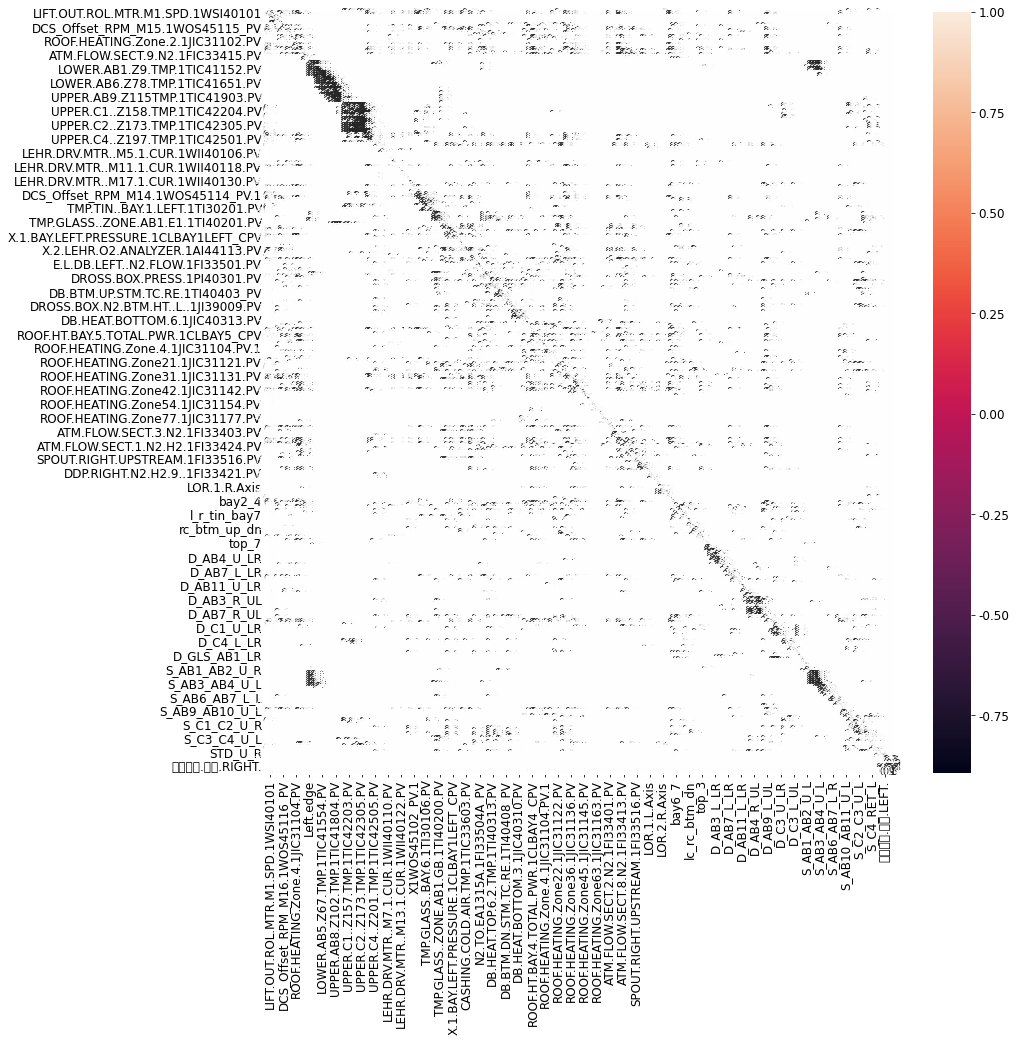

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr  = fact_data_result.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
corrMatt = fact_data_result.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corrMatt, cmap='Blues')

In [ ]:
x_axis_data = fact_data_result[]
plt.scatter(x_axis_data, y_axis_data,
               marker = marker, label = iris.target_names[i])
plt.show()

In [ ]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())


In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

In [ ]:
# OSX 의 설치 된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))